Вариант 5	
Класс 1: setosa	
Класс 2: virginica	
Классификатор 1: Наивный байесовский 	
Классификатор 2: Логистическая регрессия

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve, ConfusionMatrixDisplay
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
iris = datasets.load_iris(as_frame=True)
table = pd.DataFrame(iris.data,columns=iris.feature_names)
table['name'] = iris.target
table = table[(table['name']==0) | (table['name']==2)]
table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


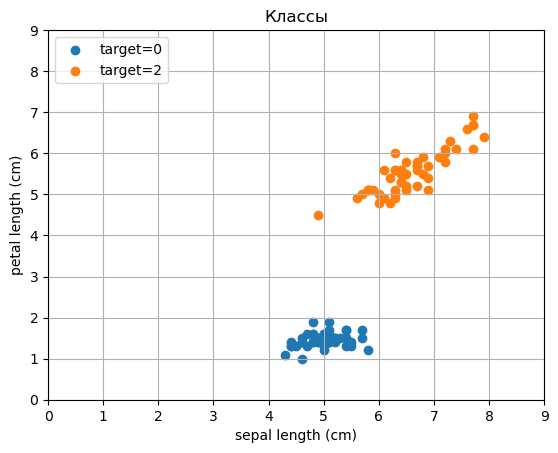

In [87]:
axes = plt.axes()
axes.set_xlim([0, 9])         
axes.set_ylim([0, 9])          
legend = []
plt.title('Классы')
x_lable='sepal length (cm)'
y_lable='petal length (cm)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in table.groupby('name'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("target=%s" % c)
plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

Байесовский 

In [98]:
modelB = GaussianNB()
data = table
#0 - Setosa
#2 - virginica
annotation1 = [0]*50
annotation2 = [1]*50
annotations = annotation1+annotation2

In [99]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.92)
modelB.fit(Xtrain, Ytrain)

GaussianNB()

In [100]:
pred = modelB.predict(Xtest)
accuracy = np.mean(pred == Ytest)
print(accuracy*100, '%')

100.0 %


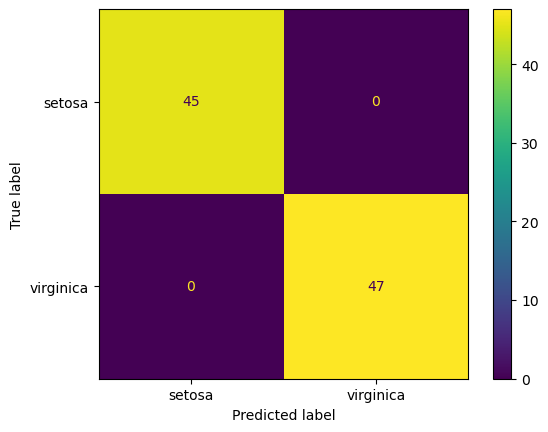

In [101]:
conf_mat = confusion_matrix(Ytest, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["setosa","virginica"])
disp.plot()
plt.show()

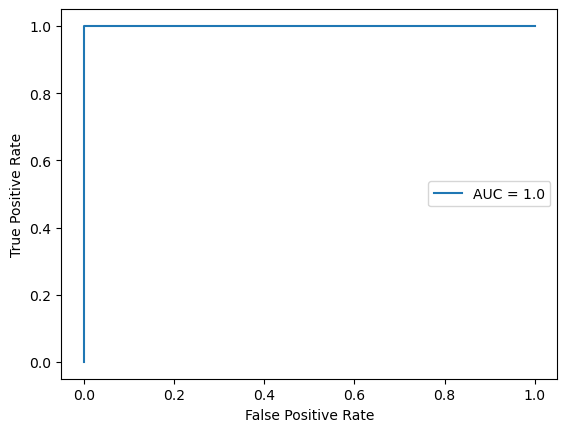

In [92]:
y_pred_proba = modelB.predict_proba (Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve (Ytest, y_pred_proba)
auc = metrics.roc_auc_score (Ytest, y_pred_proba)
plt.plot (fpr,tpr, label="AUC = "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=5)
plt.show() 

In [102]:
modelL= LogisticRegression()
data1 = table
annotation3 = [0]*50
annotation4 = [1]*50
annotations1 = annotation3+annotation4
data1, annotations1 = shuffle(data1, annotations1)
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(data1, annotations1, test_size=0.92)
modelL.fit(Xtrain1, Ytrain1)

LogisticRegression()

In [103]:
pred1 = modelL.predict(Xtest1)
accuracy1 = np.mean(pred1 == Ytest1)
print(accuracy1*100, '%')

100.0 %


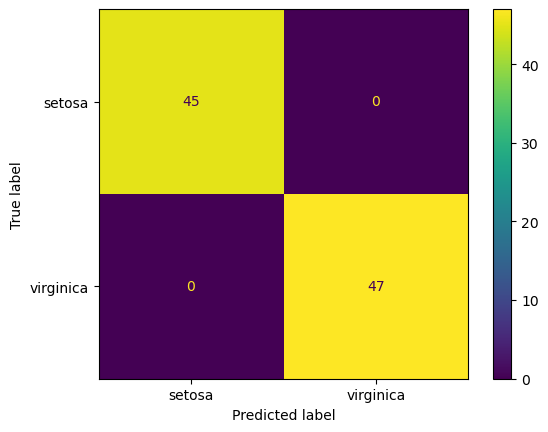

In [104]:
conf_mat1 = confusion_matrix(Ytest1, pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=["setosa","virginica"])
disp1.plot()
plt.show()

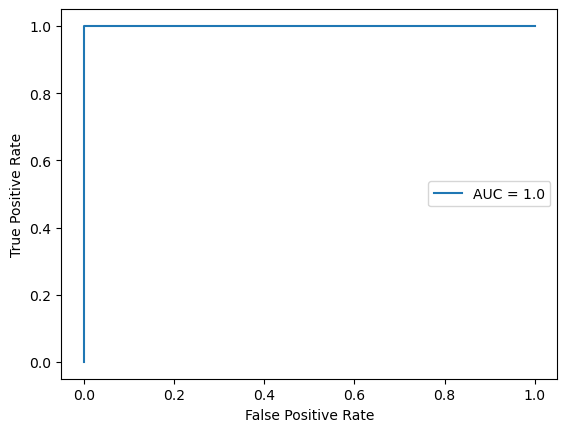

In [96]:
y_pred_proba1 = modelB.predict_proba (Xtest1)[::,1]
fpr1, tpr1, _ = metrics.roc_curve (Ytest1, y_pred_proba1)
auc1 = metrics.roc_auc_score (Ytest1, y_pred_proba1)
plt.plot (fpr1,tpr1, label="AUC = "+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=5)
plt.show() 

Оба классификатора работают одинаково